# Install Required Libraries

In [ ]:
pip install pandas plotly folium

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/Weather dataset/Breakdown_City.csv')
df

,City,Climate change: (1/1/04 - 9/27/21),Global Warming: (1/1/04 - 9/27/21)
0,Manila,64%,36%
1,Makati,65%,35%
2,Cebu City,67%,33%
3,Quezon City,70%,30%
4,Pretoria,66%,34%
...,...,...,...
67,Amsterdam,70%,30%
68,Jakarta,53%,47%
69,Bangkok,62%,38%
70,Paris,79%,21%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   City                                72 non-null     object
 1   Climate change: (1/1/04 - 9/27/21)  72 non-null     object
 2   Global Warming: (1/1/04 - 9/27/21)  72 non-null     object
dtypes: object(3)
memory usage: 1.8+ KB


# Data Cleaning

In [ ]:
# Clean the dataset by converting percentage strings to numeric values
df['Climate change (%)'] = df['Climate change: (1/1/04 - 9/27/21)'].str.rstrip('%').astype(float)
df['Global Warming (%)'] = df['Global Warming: (1/1/04 - 9/27/21)'].str.rstrip('%').astype(float)

# Drop the original percentage columns for clarity
data_cleaned = df.drop(columns=['Climate change: (1/1/04 - 9/27/21)', 'Global Warming: (1/1/04 - 9/27/21)'])

# Display the cleaned dataset
data_cleaned.head()

,City,Climate change (%),Global Warming (%)
0,Manila,64.0,36.0
1,Makati,65.0,35.0
2,Cebu City,67.0,33.0
3,Quezon City,70.0,30.0
4,Pretoria,66.0,34.0


# 1. boxplot

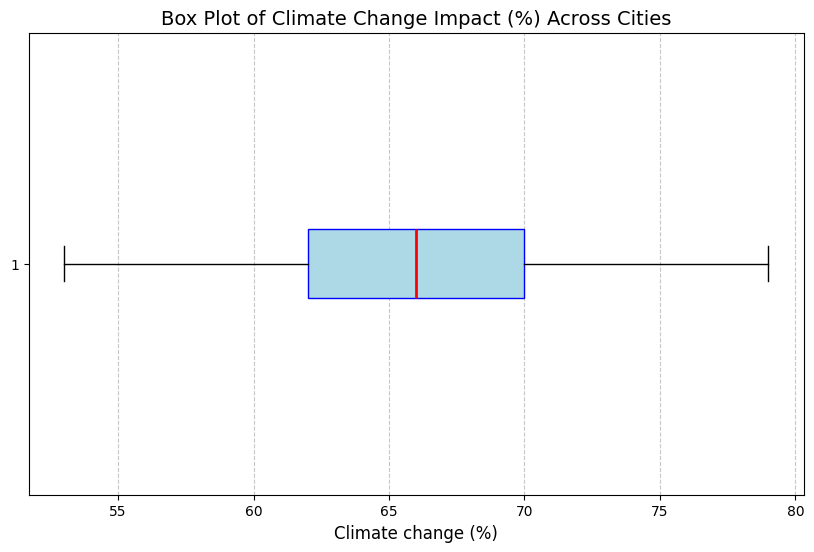

In [ ]:

    plt.figure(figsize=(10, 6))
    plt.boxplot(df['Climate change (%)'].dropna(), vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2))

    plt.title('Box Plot of Climate Change Impact (%) Across Cities', fontsize=14)
    plt.xlabel('Climate change (%)', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


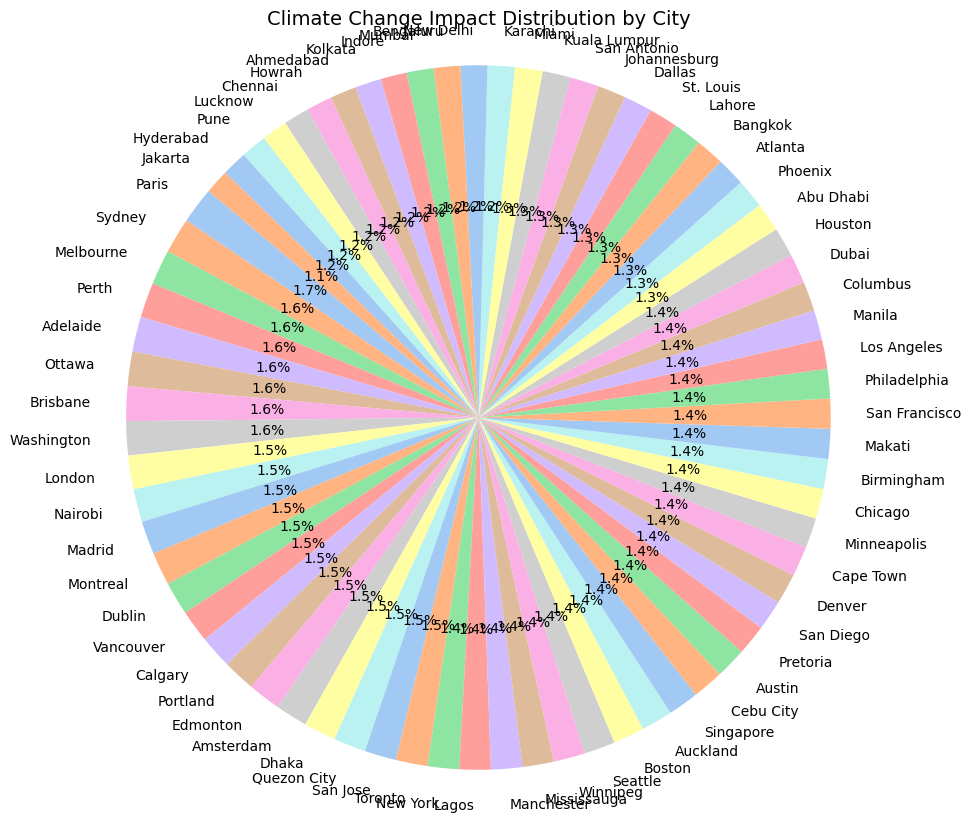

In [ ]:
import seaborn as sns

# Example: Visualizing data as a pie chart using seaborn and matplotlib
# Assuming 'City' as a categorical column and 'Climate change (%)' as the corresponding numerical value

if 'City' in df.columns and 'Climate change (%)' in df.columns:
    # Aggregate data by city to calculate total climate change impact
    city_data = df.groupby('City')['Climate change (%)'].sum().sort_values(ascending=False)

    # Plot the pie chart
    plt.figure(figsize=(10, 10))
    plt.pie(city_data, labels=city_data.index, autopct='%1.1f%%', startangle=140,
            colors=sns.color_palette('pastel', len(city_data)))

    plt.title('Climate Change Impact Distribution by City', fontsize=14)
    plt.axis('equal')  # Ensure the pie chart is a circle
    plt.show()
else:
    print("Required columns are not found in the dataset.")

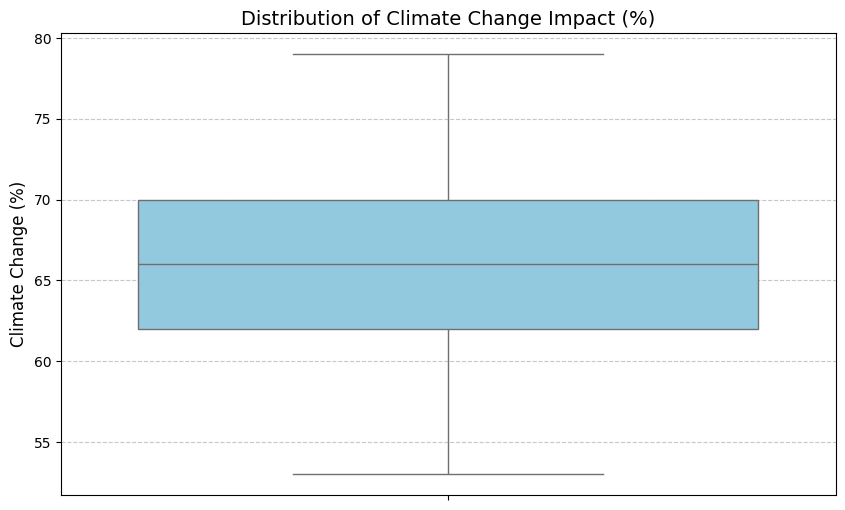

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Pass the DataFrame to the 'data' argument
sns.boxplot(data=df, y='Climate change (%)', color='skyblue')
plt.title('Distribution of Climate Change Impact (%)', fontsize=14)
plt.ylabel('Climate Change (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-25-f2b8aad9ac92>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Climate change (%)', y='City', palette='viridis', alpha=0.8)


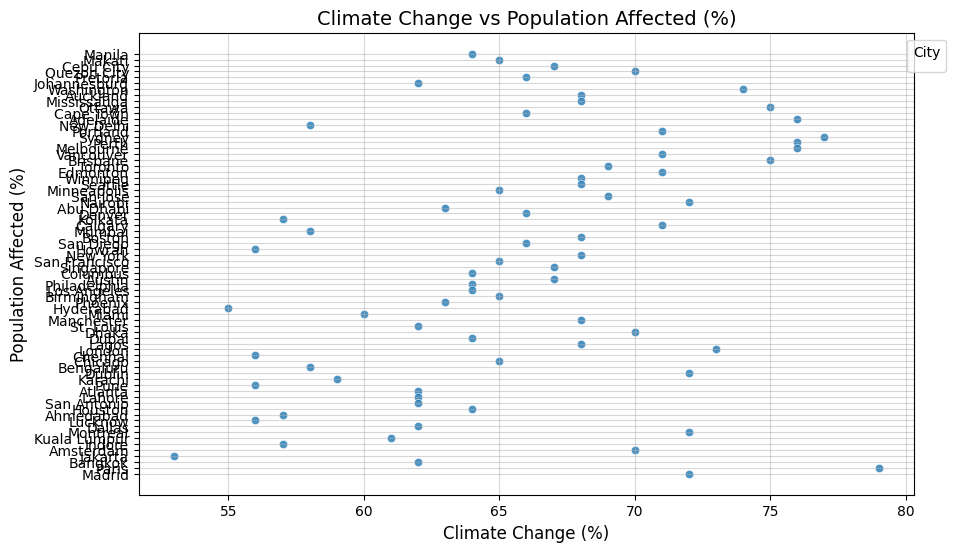

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Use the column name directly within the 'x' and 'y' arguments
sns.scatterplot(data=df, x='Climate change (%)', y='City', palette='viridis', alpha=0.8)
plt.title('Climate Change vs Population Affected (%)', fontsize=14)
plt.xlabel('Climate Change (%)', fontsize=12)
plt.ylabel('Population Affected (%)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), title='City')
plt.grid(alpha=0.5)
plt.show()

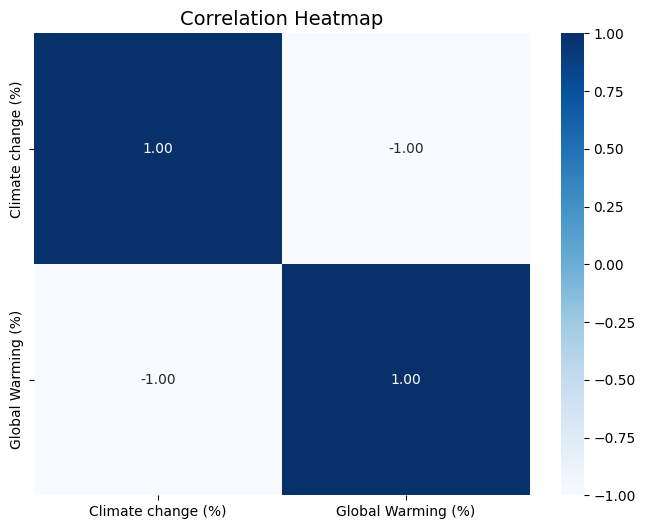

In [ ]:
correlation_matrix = df[['Climate change (%)', 'Global Warming (%)']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt='.2f')
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

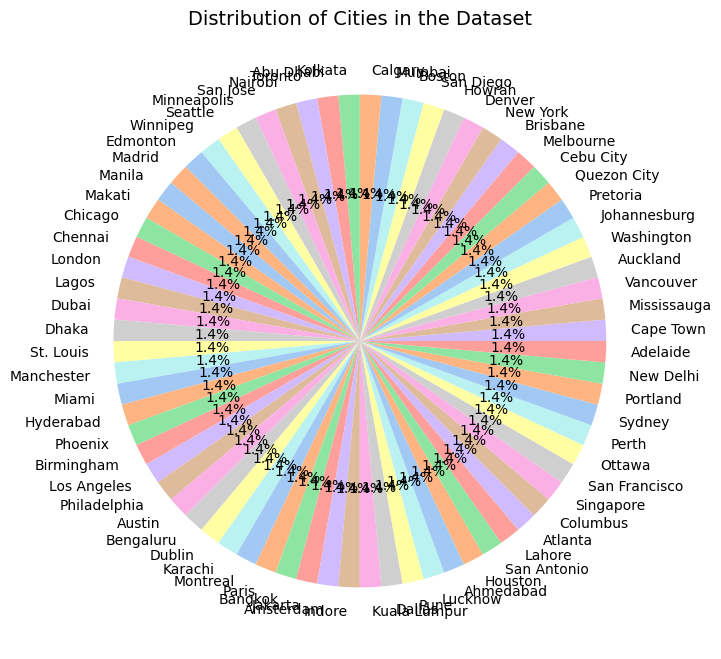

In [ ]:
import seaborn as sns

# Example: Creating a pie chart for a categorical column's distribution
# Let's use 'City' for demonstration, counting occurrences of each city
if 'City' in df.columns:
    # Count occurrences of each city
    city_counts = df['City'].value_counts()

    # Plot a pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%',
            colors=sns.color_palette("pastel"), startangle=140)

    plt.title('Distribution of Cities in the Dataset', fontsize=14)
    plt.show()
else:
    print("The 'City' column is not found in the dataset.")

# 3. Bar Chart with Plotly

In [ ]:
# Visualization 1: Bar chart comparing Climate Change and Global Warming percentages for top cities
top_cities = data_cleaned.nlargest(10, 'Climate change (%)')  # Top 10 cities by Climate Change percentage
fig_bar = px.bar(
    top_cities,
    x='City',
    y=['Climate change (%)', 'Global Warming (%)'],
    barmode='group',
    title="Top 10 Cities: Climate Change vs. Global Warming (%)",
    labels={'value': 'Percentage', 'variable': 'Category'},
    template='plotly_dark'
)
fig_bar.show()

# 4.Heatmap: Awareness Across Cities
A heatmap can highlight variations in climate change and global warming awareness across cities.

In [ ]:
import plotly.express as px

fig = px.density_heatmap(
    data_cleaned,
    x='City',
    y='Climate change (%)',
    z='Global Warming (%)',
    color_continuous_scale='Viridis',
    title="Heatmap of Awareness: Climate Change vs. Global Warming",
    labels={'z': 'Global Warming (%)'},
)
fig.show()

# 5.Line Plot: Awareness Trends by Percentage
A line plot can reveal how awareness levels for both climate change and global warming differ as percentages increase.

In [ ]:
import numpy as np

# Sort cities by Climate Change percentage
data_sorted = data_cleaned.sort_values(by='Climate change (%)')

fig = px.line(
    data_sorted,
    x=np.arange(len(data_sorted)),
    y=['Climate change (%)', 'Global Warming (%)'],
    title='Trends: Climate Change vs. Global Warming Awareness',
    labels={'x': 'City Rank (by Climate Change Awareness)', 'value': 'Percentage'},
    template='plotly_white'
)
fig.show()

#6. Highlight Key Cities
Identify cities with significant gaps between climate change and global warming awareness:

In [ ]:
data_cleaned['Awareness Gap (%)'] = abs(data_cleaned['Climate change (%)'] - data_cleaned['Global Warming (%)'])

fig = px.bar(
    data_cleaned.nlargest(10, 'Awareness Gap (%)'),
    x='City',
    y='Awareness Gap (%)',
    title='Top 10 Cities with Largest Awareness Gaps',
    template='plotly_dark',
    labels={'Awareness Gap (%)': 'Gap in Awareness (%)'}
)
fig.show()

# 7. Folium Map

In [ ]:
city_coordinates = {
    "Manila": [14.5995, 120.9842],
    "Makati": [14.5547, 121.0244],
    "Cebu City": [10.3157, 123.8854],
    "Quezon City": [14.6760, 121.0437],
    "Pretoria": [-25.7479, 28.2293],
    "Johannesburg": [-26.2041, 28.0473],
    "Washington": [38.9072, -77.0369],
    "Auckland": [-36.8485, 174.7633],
    "Mississauga": [43.5890, -79.6441],
    "Ottawa": [45.4215, -75.6972],
    "Cape Town": [-33.9249, 18.4241],
    "Adelaide": [-34.9285, 138.6007],
    "New Delhi": [28.6139, 77.2090],
    "Portland": [45.5051, -122.6750],
    "Sydney": [-33.8688, 151.2093],
    "Perth": [-31.9505, 115.8605],
    "Melbourne": [-37.8136, 144.9631],
    "Vancouver": [49.2827, -123.1207],
    "Brisbane": [-27.4698, 153.0251],
    "Toronto": [43.6511, -79.3832],
    "Edmonton": [53.5461, -113.4938],
    "Winnipeg": [49.8951, -97.1384],
    "Seattle": [47.6062, -122.3321],
    "Minneapolis": [44.9778, -93.2650],
    "San Jose": [37.3382, -121.8863],
    "Nairobi": [-1.2864, 36.8172],
    "Abu Dhabi": [24.4539, 54.3773],
    "Denver": [39.7392, -104.9903],
    "Kolkata": [22.5726, 88.3639],
    "Calgary": [51.0447, -114.0719],
    "Mumbai": [19.0760, 72.8777],
    "Boston": [42.3601, -71.0589],
    "San Diego": [32.7157, -117.1611],
    "Howrah": [22.5958, 88.2636],
    "New York": [40.7128, -74.0060],
    "San Francisco": [37.7749, -122.4194],
    "Singapore": [1.3521, 103.8198],
    "Columbus": [39.9612, -82.9988],
    "Austin": [30.2672, -97.7431],
    "Philadelphia": [39.9526, -75.1652],
    "Los Angeles": [34.0522, -118.2437],
    "Birmingham": [33.5186, -86.8104],
    "Phoenix": [33.4484, -112.0740],
    "Hyderabad": [17.3850, 78.4867],
    "Miami": [25.7617, -80.1918],
    "Manchester": [53.4808, -2.2426],
    "St. Louis": [38.6270, -90.1994],
    "Dhaka": [23.8103, 90.4125],
    "Dubai": [25.276987, 55.296249],
    "Lagos": [6.5244, 3.3792],
    "London": [51.5074, -0.1278],
    "Chennai": [13.0827, 80.2707],
    "Chicago": [41.8781, -87.6298],
    "Bengaluru": [12.9716, 77.5946],
    "Dublin": [53.3498, -6.2603],
    "Karachi": [24.8607, 67.0011],
    "Pune": [18.5204, 73.8567],
    "Atlanta": [33.7490, -84.3880],
    "Lahore": [31.5204, 74.3587],
    "San Antonio": [29.4241, -98.4936],
    "Houston": [29.7604, -95.3698],
    "Ahmedabad": [23.0225, 72.5714],
    "Lucknow": [26.8467, 80.9462],
    "Dallas": [32.7767, -96.7970],
    "Montreal": [45.5017, -73.5673],
    "Kuala Lumpur": [3.1390, 101.6869],
    "Indore": [22.7196, 75.8577],
    "Amsterdam": [52.3676, 4.9041],
    "Jakarta": [-6.2088, 106.8456],
    "Bangkok": [13.7563, 100.5018],
    "Paris": [48.8566, 2.3522],
    "Madrid": [40.4168, -3.7038]
}

# Map latitude and longitude to the dataset
data_cleaned['Latitude'] = data_cleaned['City'].map(lambda x: city_coordinates.get(x, [None, None])[0])
data_cleaned['Longitude'] = data_cleaned['City'].map(lambda x: city_coordinates.get(x, [None, None])[1])

In [ ]:
import folium

# Initialize a map
map_cities = folium.Map(location=[20, 0], zoom_start=2)

# Add cities to the map
for index, row in data_cleaned.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,
            popup=f"{row['City']}: {row['Climate change (%)']}% Climate Change",
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(map_cities)

map_cities